
<div align='left' style="width:400px;height:120px;overflow:hidden;">
<a href='http://www.uff.br'>
<img align='left' style='display: block;height: 92%' src='imgs/UFF.png' alt='UFF logo' title='UFF logo'/>
</a>
<a href='http://www.ic.uff.br'>
<img align='left' style='display: block;height: 100%' src='imgs/logo-ic.png' alt='IC logo' title='IC logo'/>
</a>
</div>

### Machine Learning
# Unsupervised Learning and Clustering

### [Luis Martí](http://lmarti.com)
#### [Instituto de Computação](http://www.ic.uff)
#### [Universidade Federal Fluminense](http://www.uff.br)
$\newcommand{\vec}[1]{\boldsymbol{#1}}$

In [1]:
import random, itertools
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#plt.rc('text', usetex=True); plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid'); seaborn.set_context('talk')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# fixing a seed for reproducibility, do not do this in real life. 
random.seed(a=42)

### About the notebook/slides

* The slides are _programmed_ as a [Jupyter](http://jupyter.org)/[IPython](https://ipython.org/) notebook.
* **Feel free to try them and experiment on your own by launching the notebooks.**

* You can run the notebook online: [![Binder](http://mybinder.org/badge.svg)](http://mybinder.org/repo/lmarti/machine-learning)

If you are using [nbviewer](http://nbviewer.jupyter.org) you can change to slides mode by clicking on the icon:

<div class="container-fluid">
  <div class="row">
      <div class="col-md-3"><span/></div>
      <div class="col-md-6">
      <div class='well well-sm'>
              <img src='imgs/view-as-slides.png'/>
      </div>
      </div>
      <div class="col-md-3" align='center'><span/></div>
  </div>
</div>

## Unsupervised learning
* A type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses.
* The most common unsupervised learning method is cluster analysis,
    * used for exploratory data analysis to find hidden patterns or grouping in data.
* Also useful for [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction).
* The clusters are modeled using a measure of similarity which is defined upon metrics such as Euclidean or probabilistic distance.

We are going to present two approaches to unsupervised learning and present some sample applications:
* *Dimensionality reduction* with *principal components analysis* (PCA)
* *Clustering* with the *$k$-means algorithm*.

## Approaches

* **Connectivity models**: for example, [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) builds models based on distance connectivity.
* **Centroid models**: for example, the $k$-means algorithm represents each cluster by a single mean vector.
* **Distribution models**: clusters are modeled using statistical distributions, such as multivariate normal distributions used by the Expectation-maximization algorithm.
* **Density models**: for example, [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) and [OPTICS](https://en.wikipedia.org/wiki/OPTICS_algorithm) defines clusters as connected dense regions in the data space.
* **Graph-based models**: a clique, that is, a subset of nodes in a graph such that every two nodes in the subset are connected by an edge can be considered as a prototypical form of cluster.
    * Relaxations of the complete connectivity requirement (a fraction of the edges can be missing) are known as quasi-cliques, as in the HCS clustering algorithm.

Common clustering algorithms include:

* *Hierarchical clustering*: builds a multilevel hierarchy of clusters by creating a cluster tree
* *$k$-Means clustering*: partitions data into k distinct clusters based on distance to the centroid of a cluster
* *Gaussian mixture models*: models clusters as a mixture of multivariate normal density components
* *Self-organizing maps*: uses neural networks that learn the topology and distribution of the data
* *Hidden Markov models*: uses observed data to recover the sequence of states

## Cluster analysis or clustering

* The task of grouping a set of objects in such a way that 
* objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). 
* It is a main task of exploratory data mining, and a common technique for statistical data analysis,

# Dimensionality Reduction with Principal Component Analysis

* Uses an **orthogonal transformation** to convert a set of observations of **possibly correlated variables** into a set of values of **linearly uncorrelated variables** called **principal components**. 
* Useful linear dimensionality reduction technique.

We'll start with our standard set of initial imports:

### Flashback

In linear algebra, an [orthogonal transformation](https://en.wikipedia.org/wiki/Orthogonal_transformation) is a linear transformation $T: V \rightarrow V$ on a real inner product space $V$, that preserves the inner product. That is, for each pair $u$, $v$ of elements of $V$, we have
$$
\langle u,v \rangle = \langle Tu,Tv \rangle \,.
$$

* Since the lengths of vectors and the angles between them are defined through the inner product, orthogonal transformations preserve lengths of vectors and angles between them. 
* Orthogonal transformations map orthonormal bases to orthonormal bases.
* Orthogonal transformations in two- or three-dimensional Euclidean space are stiff rotations, reflections, or combinations of a rotation and a reflection (also known as improper rotations). 
* Reflections are transformations that exchange left and right, similar to mirror images. 
* The matrices corresponding to proper rotations (without reflection) have determinant +1. 
* Transformations with reflection are represented by matrices with determinant −1. 
* This allows the concept of rotation and reflection to be generalized to higher dimensions.

Consider a data matrix, $\vec{X}$, of shape $n\times p$ such that:
* column-wise zero empirical mean (the sample mean of each column has been shifted to zero), 
* each of the $n$ rows represents a different repetition of the experiment, 
* and each of the $p$ columns represents a given input feature feature (say, the results from a particular sensor).

The transformation is defined by a set of $p$-dimensional vectors of weights or loadings
$$
\vec{w}_{(k)} = (w_1, \dots, w_p)_{(k)}$$
that map each row vector $\vec{x}_{(i)}$ of $\vec{X}$ to a new vector of principal component scores $\vec{t}_{(i)} = (t_1, \dots, t_k)_{(i)}$, given by
$$
{t_{k}}_{(i)} = \vec{x}_{(i)} \cdot \vec{w}_{(k)}
$$
such that  individual variables of $\vec{t}$ considered over the data set successively inherit the maximum possible variance from $\vec{X}$, with each loading vector $\vec{w}$ constrained to be a unit vector.

## First component

The first loading vector $\vec{w}_{(1)}$ has to satisfy
$$
\vec{w}_{(1)}
 = \underset{\Vert \vec{w} \Vert = 1}{\operatorname{\arg\,max}}\,\left\{ \sum_i \left(t_1\right)^2_{(i)} \right\}
 = \underset{\Vert \mathbf{w} \Vert = 1}{\operatorname{\arg\,max}}\,\left\{ \sum_i \left(\vec{x}_{(i)} \cdot \vec{w} \right)^2 \right\}
$$

Rewriting it in matrix form gives
$$
\vec{w}_{(1)}
 = \underset{\Vert \vec{w} \Vert = 1}{\operatorname{\arg\,max}}\, \{ \Vert \vec{Xw} \Vert^2 \}
 = \underset{\Vert \vec{w} \Vert = 1}{\operatorname{\arg\,max}}\, \left\{ \vec{w}^\intercal \vec{X}^\intercal \vec{X w} \right\}
$$

* The quantity to be maximised can be recognised as a Rayleigh quotient.
* A standard result for a symmetric matrix such as $\vec{X}^\intercal\vec{X}$ is that the quotient's maximum possible value is the largest eigenvalue of the matrix.
* This occurs when $\vec{w}$ is the corresponding eigenvector.

## Remaining components

The $k$th component can be found by subtracting the first $k − 1$ principal components from $\vec{X}$:
$$
\hat{\vec{X}}_{k} = \vec{X} - \sum_{s = 1}^{k - 1} \vec{X} \vec{w}_{(s)} \vec{w}_{(s)}^{\intercal}
$$
and then finding the loading vector which extracts the maximum variance from this new data matrix
$$
\vec{w}_{(k)} = \underset{\Vert \vec{w} \Vert = 1}{\operatorname{arg\,max}} \left\{ \Vert \vec{\hat{X}}_{k} \vec{w} \Vert^2 \right\} = {\operatorname{\arg\,max}}\, \left\{ \tfrac{\vec{w}^\intercal\vec{\hat{X}}_{k}^\intercal \mathbf{\hat{X}}_{k} \vec{w}}{\vec{w}^\intercal\vec{w}} \right\}
$$

Interestingly, this produces the remaining eigenvectors of $\vec{X}^\intercal\vec{X}$, with the maximum values for the quantity in brackets given by their corresponding eigenvalues. 

* the loading vectors are eigenvectors of $\vec{X}^\intercal\vec{X}$.
* The $k$th component of a data vector $\vec{x}_{(i)}$ can therefore be given as a score $t_{k(i)} = \vec{x}_{(i)} \cdot \vec{w}_{(k)}$ in the transformed co-ordinates,
* or as the corresponding vector in the space of the original variables, $\left\{\vec{x}_{(i)}\cdot\vec{w}_{(k)}\right\}\cdot\vec{w}_{(k)}$, where $\vec{w}_{(k)}$ is the $k$th eigenvector of $\vec{X}^\intercal\vec{X}$.

The full principal components decomposition of X can therefore be given as

$$\vec{T} = \vec{X} \vec{W}$$
where $\vec{W}$ is a $p\times p$ matrix whose columns are the eigenvectors of $\vec{X}^\intercal\vec{X}$.

## Demonstrating PCA

Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* in data.

It's easiest to visualize by looking at a two-dimensional dataset:

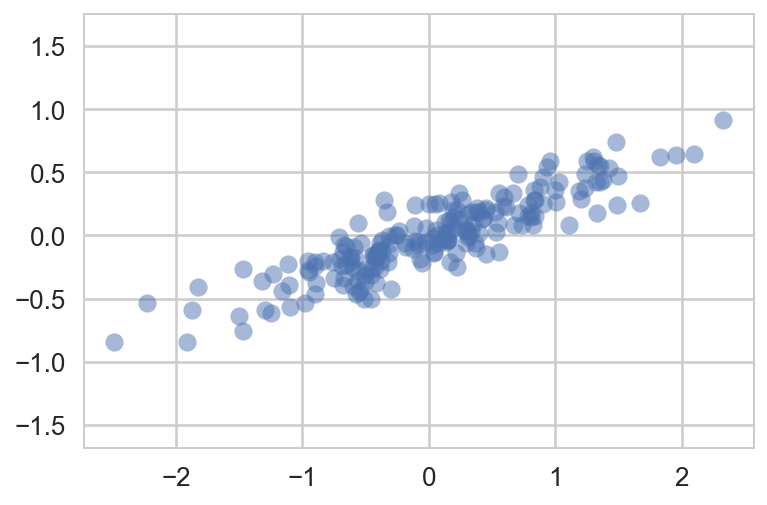

In [4]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5); plt.axis('equal');

We can see that there is a definite trend in the data. 
* What PCA seeks to do is to find the **principal axes** in the data, and 
* explain how important those axes are in describing the data distribution.

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Explained variance

In [7]:
pca.explained_variance_

array([ 0.75871884,  0.01838551])

Components

In [8]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

To see what these numbers mean, let's view them as vectors plotted on top of the data:

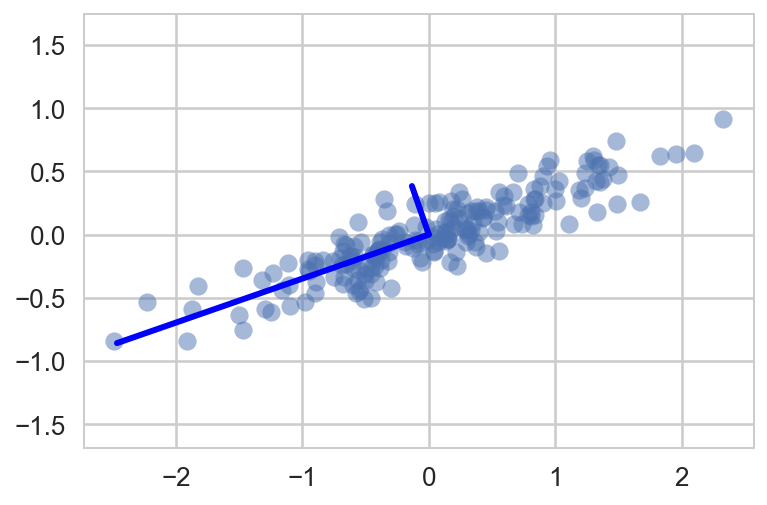

In [9]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-b', lw=3)
plt.axis('equal');

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [10]:
clf = sklearn.decomposition.PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

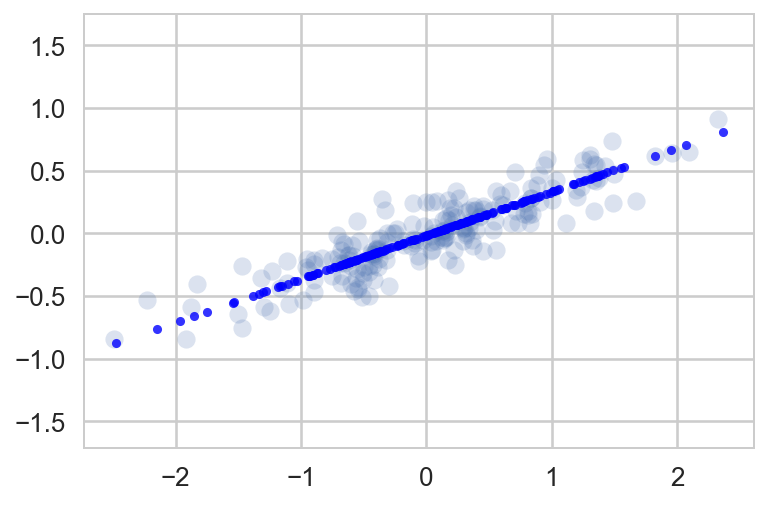

In [11]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], '.b', alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.  
* We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!
* This is the sense in which "dimensionality reduction" works: 
    * if you can approximate a data set in a lower dimension, you may have an easier time visualizing it or fitting complicated models to the data.

### Application of PCA to Digits

The dimensionality reduction might seem a bit abstract in two dimensions, but the projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.  Let's take a quick look at the application of PCA to the digits data we looked at before:

In [12]:
from sklearn.datasets import load_digits

In [13]:
digits = load_digits()
X = digits.data
y = digits.target

In [14]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [15]:
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


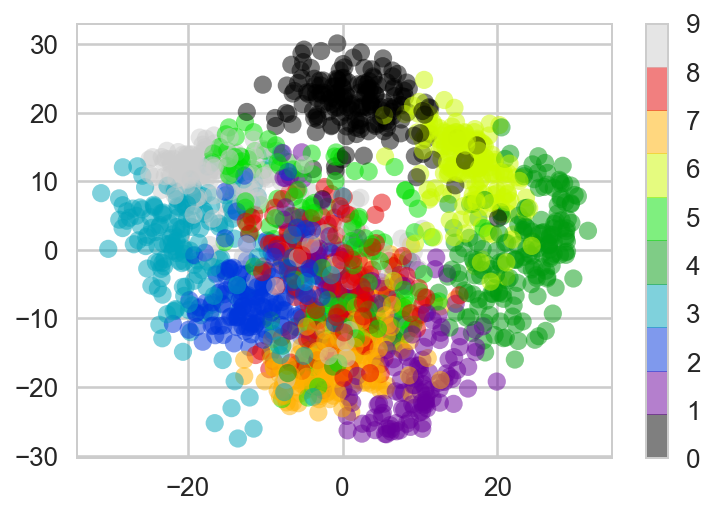

In [16]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

This gives us an idea of the relationship between the digits. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits, **without reference** to the labels.

## What do the components mean?

PCA is a useful dimensionality reduction algorithm, because it has a very intuitive interpretation via *eigenvectors*.

* The input data is represented as a vector: in the case of the digits, our data is

$$
\vec{x} = [x_1, x_2, x_3 \cdots]
$$

but what this really means is

$$
image(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots
$$

If we reduce the dimensionality in the pixel space to (say) 6, we recover only a partial image:

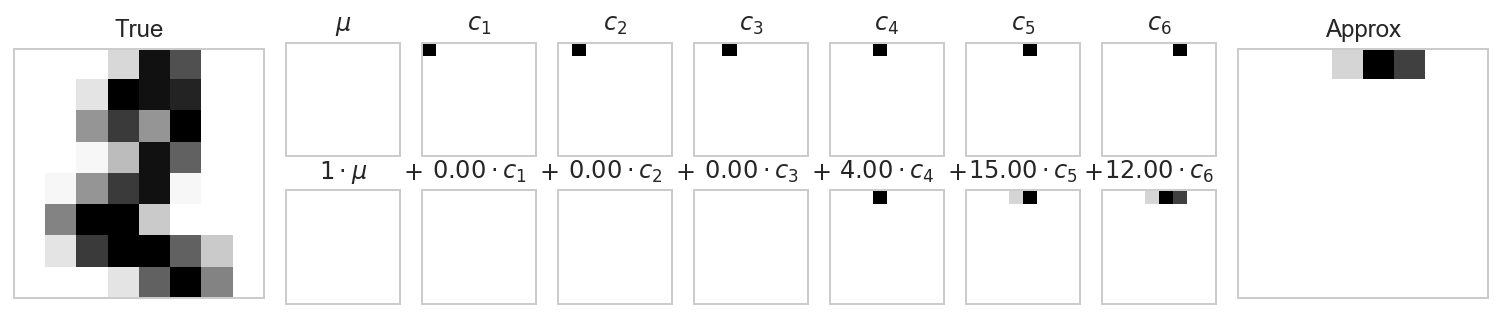

In [17]:
from fig_code.figures import plot_image_components
plot_image_components(digits.data[2])

But the pixel-wise representation is not the only choice. We can also use other *basis functions*, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

What PCA does is to choose optimal **basis functions** so that only a few are needed to get a reasonable approximation.
The low-dimensional representation of our data is the coefficients of this series, and the approximate reconstruction is the result of the sum:

In [18]:
from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

Widget Javascript not detected.  It may not be installed or enabled properly.


**Note:** if you are visualizing this notebook in (online) static form you will see here just a plot. To interact with the plot you have to run the notebook.

Here we see that with only six PCA components, we recover a reasonable approximation of the input!

Thus we see that PCA can be viewed from two angles. It can be viewed as **dimensionality reduction**, or it can be viewed as a form of **lossy data compression** where the loss favors noise. In this way, PCA can be used as a **filtering** process as well.

### Choosing the Number of Components

But how much information have we thrown away?  We can figure this out by looking at the **explained variance** as a function of the components:

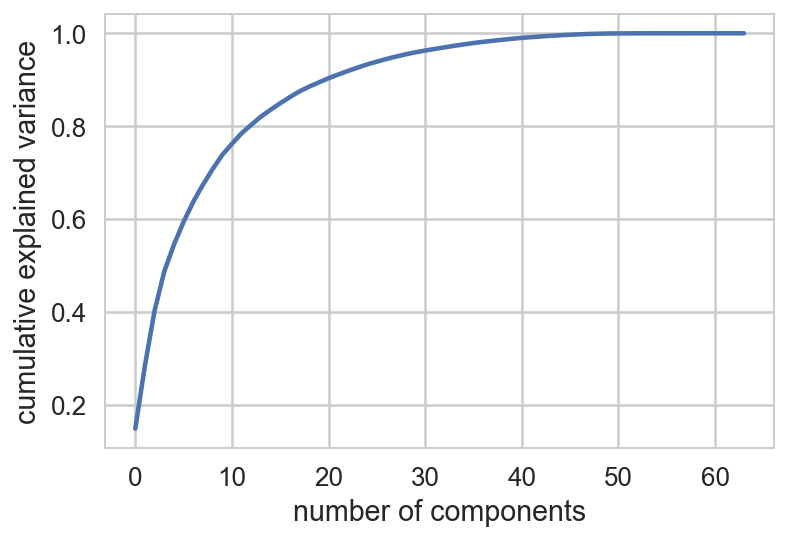

In [19]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### PCA as data compression

As we mentioned, PCA can be used for is a sort of data compression. Using a small ``n_components`` allows you to represent a high dimensional point as a sum of just a few principal vectors.

Here's what a single digit looks like as you change the number of components:

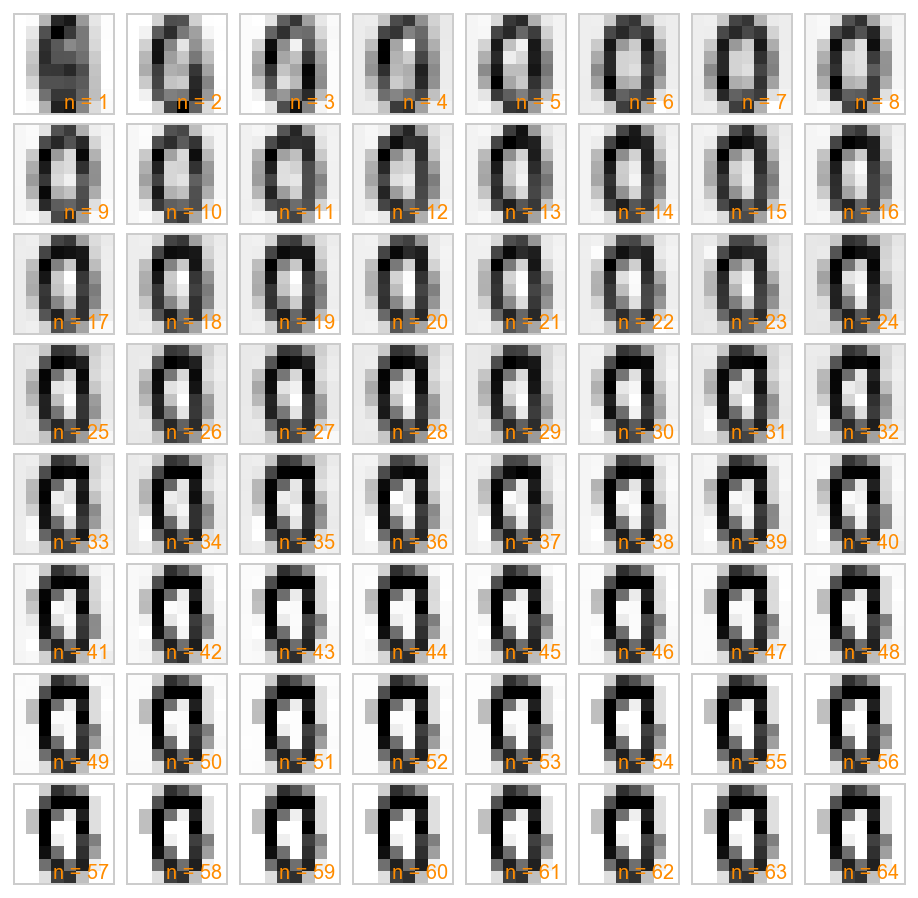

In [20]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
    pca = sklearn.decomposition.PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))
    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='darkorange')
    ax.set_xticks([]); ax.set_yticks([])

Let's take another look at this by using IPython's ``interact`` functionality to view the reconstruction of several images at once:

**Note:** if you are visualizing this notebook in (online) static form you will see here just a plot. To interact with the plot you have to run the notebook.

In [21]:
from ipywidgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    pca = PCA(n_components=n_components)
    pca.fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var), size=18)
    plt.clim(0, 16)
    plt.show()
    
interact(plot_digits, n_components=(1, 64), nside=(1, 8));

Widget Javascript not detected.  It may not be installed or enabled properly.


## Other Dimensionality Reducting Routines

Note that scikit-learn contains many other unsupervised dimensionality reduction routines: some you might wish to try are
Other dimensionality reduction techniques which are useful to know about:

- [sklearn.decomposition.PCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.PCA.html): 
   Principal Component Analysis
- [sklearn.decomposition.RandomizedPCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.RandomizedPCA.html):
   extremely fast approximate PCA implementation based on a randomized algorithm
- [sklearn.decomposition.SparsePCA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.SparsePCA.html):
   PCA variant including L1 penalty for sparsity
- [sklearn.decomposition.FastICA](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.FastICA.html):
   Independent Component Analysis
- [sklearn.decomposition.NMF](http://scikit-learn.org/0.13/modules/generated/sklearn.decomposition.NMF.html):
   non-negative matrix factorization
- [sklearn.manifold.LocallyLinearEmbedding](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html):
   nonlinear manifold learning technique based on local neighborhood geometry
- [sklearn.manifold.IsoMap](http://scikit-learn.org/0.13/modules/generated/sklearn.manifold.Isomap.html):
   nonlinear manifold learning technique based on a sparse graph algorithm
   
Each of these has its own strengths & weaknesses, and areas of application. You can read about them on the [scikit-learn website](http://sklearn.org).

# Clustering with $k$-means

## Introducing $k$-means

* As mentionend, $k$-means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

* It is a relatively easy-to-understand algorithm:
    * It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

## $k$-means clustering

* Having a dataset of the form $\Psi=\left\{\vec{x}^{(1)},\ldots,x^{(D)}\right\}$, with $\vec{x}^{(d)}\in\mathbb{R}^n$. 
* $k$-means clustering aims to partition the $D$ observations into $k$ sets $(k ≤ D)$, $S = {S_1, S_2, …, S_k}\;$ so as to minimize the within-cluster sum of squares (WCSS):

$$S= \text{arg min} \; \sum_{i=1}^{k} \; \sum_{x_j \in S_i} \; \left\| x_j -  \mu_i \right\|$$

where $\mu_i$ is the mean of points in $S_i$.

* The most common algorithm uses an iterative refinement technique. 
* Due to its ubiquity it is often called the $k$-means algorithm; 
* it is also referred to as Lloyd's algorithm, particularly in the computer science community.

Given an initial set of $k$ means $\vec{\mu}_1,\ldots,\vec{\mu}_k$, the algorithm proceeds by alternating between two steps:

1. **Assignment step**: Assign each observation to the cluster whose mean yields the least within-cluster sum of squares (WCSS). Since the sum of squares is the squared Euclidean distance, this is intuitively the "nearest" mean.
$$
S_i = \left\{ \vec{x}_d \in\Psi: \left\| \vec{x}_d - \vec{\mu}_i \right\|^2 \le \left\| \vec{x}_d - \vec{m}_j \right\|^2 \ j, 1 \le j \le k;\  i \neq j \right\},
$$
where each $x_p$ is assigned to exactly one $S^{(t)}$, even if it could be assigned to two or more of them.
2. **Update step**: Calculate the new means to be the centroids of the observations in the new clusters.
$$
\vec{\mu}_i = \frac{1}{|S^{(t)}_i|} \sum_{x_j \in S^{(t)}_i} x_j 
$$
    * Since the arithmetic mean is a least-squares estimator, this also minimizes the within-cluster sum of squares (WCSS) objective.
* The algorithm has converged when the assignments no longer change. 

### Example code of $k$-means

Lets create a four clusters dataset.

In [36]:
X_clus, y_clus = sklearn.datasets.samples_generator.make_blobs(n_samples=300, 
                                                               centers=4, 
                                                               random_state=0, 
                                                               cluster_std=0.60)

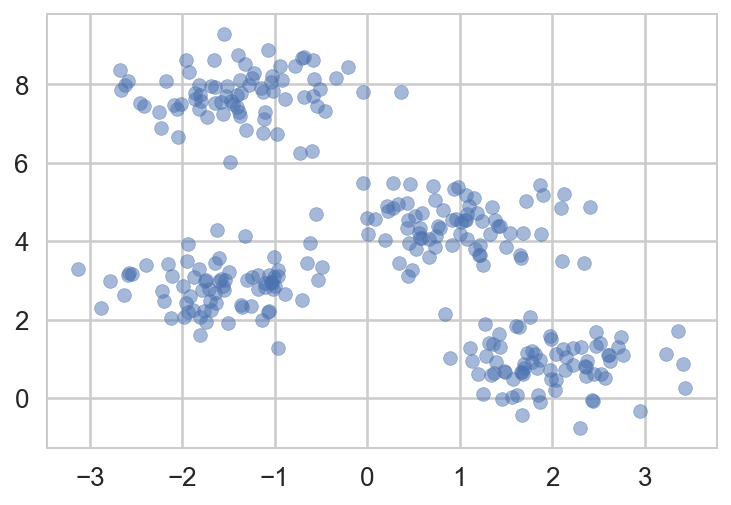

In [37]:
plt.scatter(X_clus[:, 0], X_clus[:, 1], s=47, alpha=0.5);

* It is relatively easy to distinguish the four clusters. 
* If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. 
* Fortunately, there is a well-known *Expectation Maximization* (EM) procedure which `scikit-learn` implements, so that KMeans can be solved relatively quickly.

## The $k$-means algorithm

As mentioned, $k$-means is an example of an algorithm which uses a two-step approach which works as follows:

1. Guess some cluster centers
2. Repeat until converged
   * Assign points to the nearest cluster center
   * Set the cluster centers to the mean 

In [38]:
from scipy.spatial.distance import euclidean

In [39]:
def k_means(k, X, centroids=None, stop_threshold=0.00005, random_state=42):
    if not centroids:
        centroids = sklearn.utils.resample(X, n_samples=k, replace=False, 
                                           random_state=random_state)
        
    centroid_paths = [[c.copy()] for c in centroids]
    errors = []
    while True:
        # assign points to clusters
        clusters = [[] for _ in range(k)] # k empty clusters
        for x in X:
            distances = [euclidean(x, centroid) for centroid in centroids]
            clusters[np.argmin(distances)].append(x)
        
        diffs = []
        for i, cluster in enumerate(clusters):
            if len(cluster) > 0:
                centroid = np.mean(cluster, axis=0)
                diffs.append(euclidean(centroid, centroids[i]))
                centroids[i] = centroid
                centroid_paths[i].append(centroid)

        # compute the errors
        errors.append(np.mean([min([euclidean(centroid, point) 
                                    for centroid in centroids]) for point in X]))
        
        # are we seeing any progress?
        if max(diffs) < stop_threshold: break
    return centroids, clusters, errors, centroid_paths

Running the algorithm for four clusters:

In [40]:
k=4

In [41]:
centroids, clusters, errors, centroid_paths = k_means(k, X_clus)

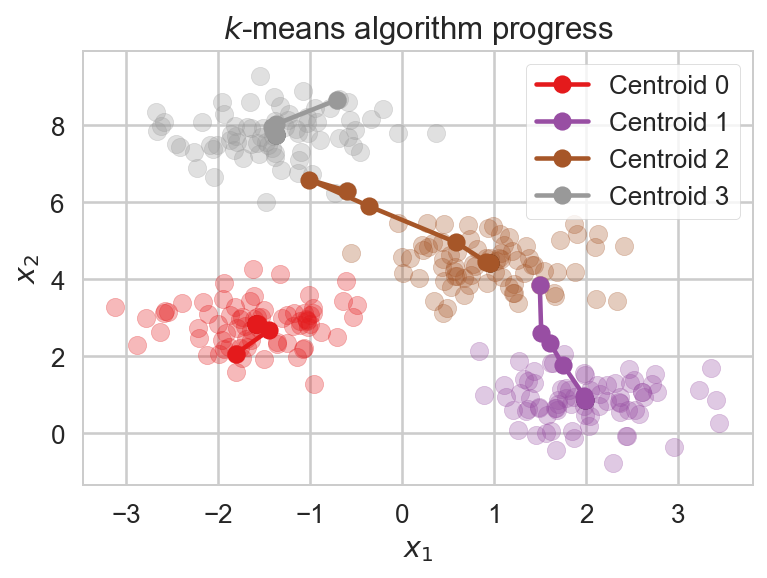

In [42]:
colors = cm.Set1(np.linspace(0,1,len(clusters)))
for i, cluster in enumerate(clusters):
    if len(cluster) > 0: 
        c = np.array(cluster)
        plt.scatter(c[:,0], c[:,1], c=colors[i], alpha=0.3)
for i, path in enumerate(centroid_paths):
    p = np.array(path)
    plt.plot(p[:,0], p[:,1], 'o-', c=colors[i], label="Centroid %d" % i)
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='o', s=75, c='k')
plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); plt.title('$k$-means algorithm progress');
plt.legend(loc='best', frameon=True);

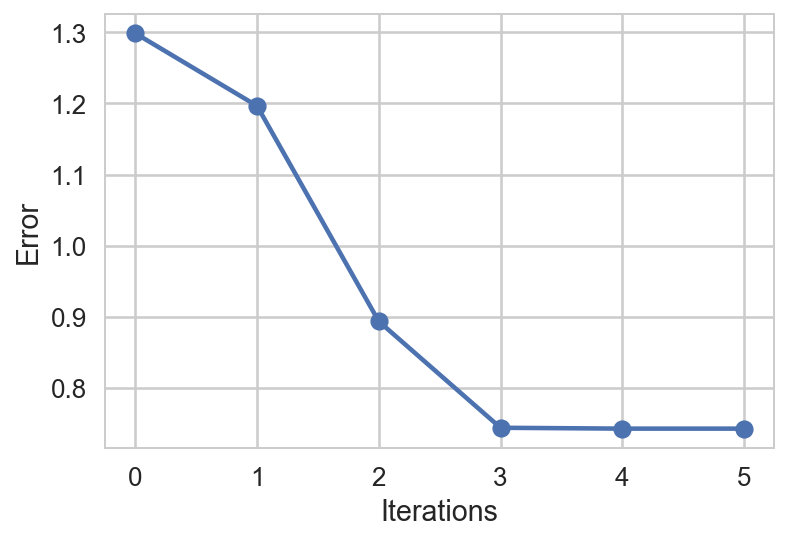

In [43]:
plt.plot(errors,'o-')
plt.xlabel('Iterations'); plt.ylabel('Error');

This is best visualized in an interactive way.

**Note:** if you are visualizing this notebook in (online) static form you will see here just a plot. To interact with the plot you have to run the notebook.

In [44]:
from fig_code import plot_kmeans_interactive
plot_kmeans_interactive();

Widget Javascript not detected.  It may not be installed or enabled properly.


## $k$-means drawbacks

* The convergence of this algorithm is not guaranteed; 
* for that reason, scikit-learn by default uses a large number of random initializations and finds the best results.
* The number of clusters must be set beforehand which contradicts the fact that we know very little about the problem.
* There are other clustering algorithms for which this requirement may be lifted.

Improvements:
* Restarting,
* centroids initialization,
* dealing with "zombie" centroids that create empty clusters, and more.

Be ware that there are many other algorithms. Let's take a quick look at some of them.

In [45]:
import sklearn.cluster as clu

In [46]:
methods = [clu.SpectralClustering(k), clu.AgglomerativeClustering(4),
           clu.MeanShift(), clu.AffinityPropagation(), clu.DBSCAN()]

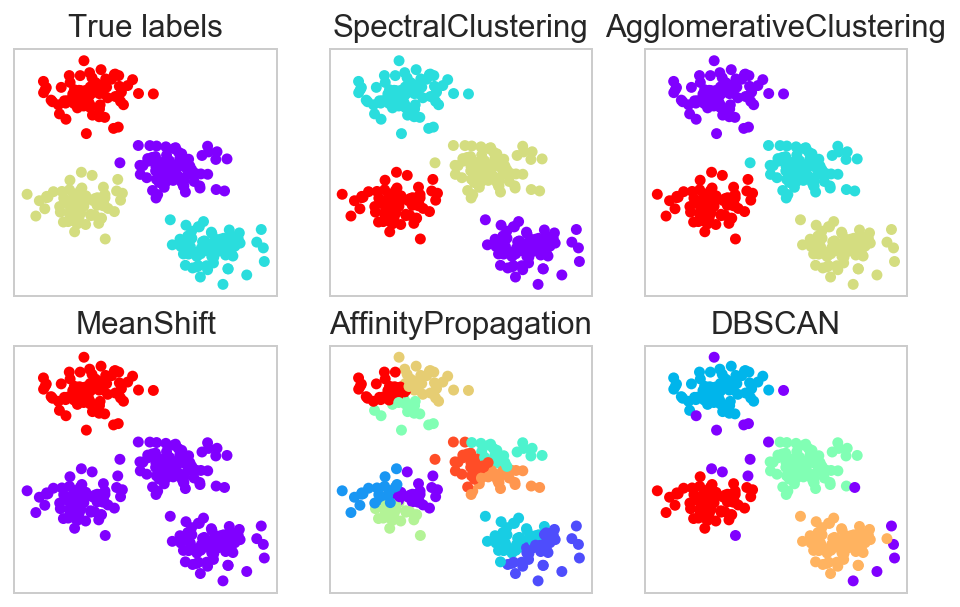

In [47]:
plt.figure(figsize=(8,5)); plt.subplot(231)
plt.scatter(X_clus[:,0], X_clus[:,1], c=y_clus, s=30,
            linewidths=0, cmap=plt.cm.rainbow)
plt.xticks([]); plt.yticks([]); plt.title("True labels")
for i, est in enumerate(methods):
    c = est.fit(X_clus).labels_
    plt.subplot(232 + i)
    plt.scatter(X_clus[:,0], X_clus[:,1], c=c, s=30,
                linewidths=0, cmap=plt.cm.rainbow)
    plt.xticks([]); plt.yticks([]); plt.title(est.__class__.__name__)

## Appliying of $k$-means to the the digits dataset

* For a closer-to-real-world example, let's take a look (again) at the digits dataset. 
* We will use $k$-means to automatically cluster the data in 64 dimensions into 10 clusters...
* ...and then look at the cluster centers to see what the algorithm has found.

In [48]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

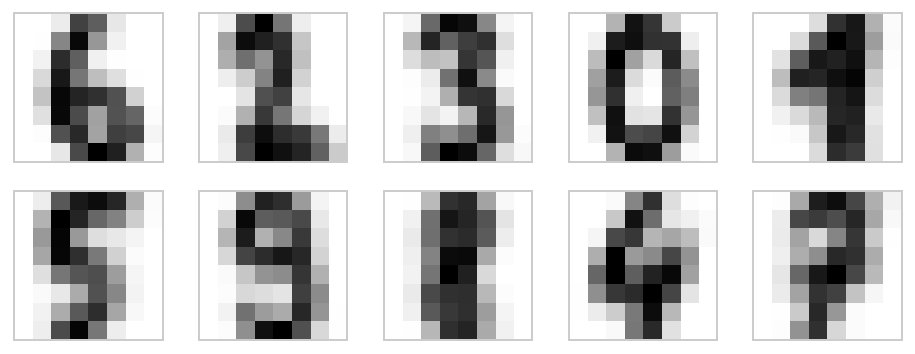

In [49]:
fig = plt.figure(figsize=(8, 3))
for i, centroid in enumerate(est.cluster_centers_):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(centroid.reshape((8, 8)), cmap=plt.cm.binary)

* We see that *even without the labels*, $k$-means is able to find clusters whose means are recognizable digits!
* Except for number 8!

The cluster labels are permuted; let's fix that:

In [50]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we have associated each cluster with its corresponding true label.

For good measure, let's use our PCA 2D projection and look at the true cluster labels and $k$-means cluster labels:

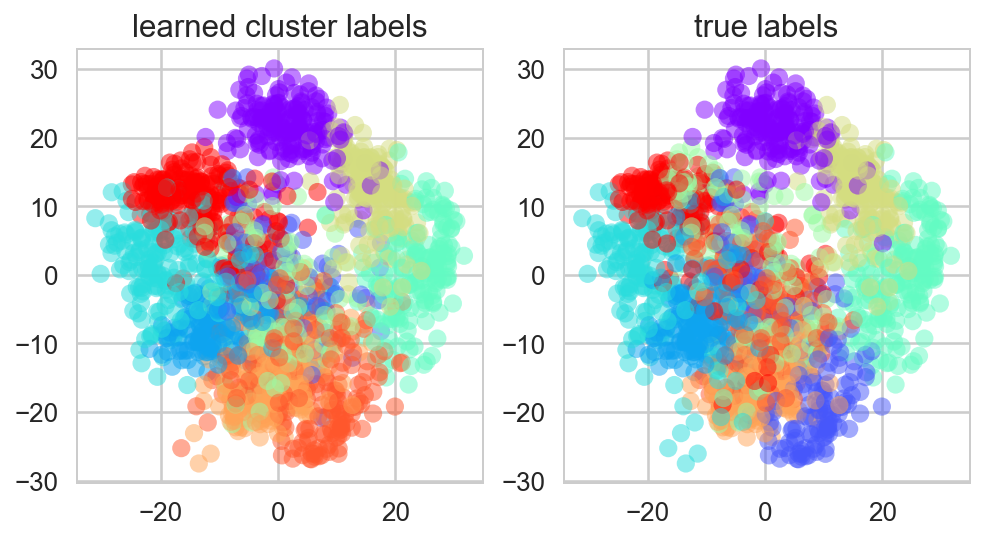

In [51]:
X = PCA(2).fit_transform(digits.data)

kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10), edgecolor='none', alpha=0.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax1.set_title('learned cluster labels')
ax2.scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax2.set_title('true labels');

Let's see how accurate our $k$-means classifier is **with no label information:**

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79187534780189206

Not bad at all!

The confusion matrix for this:

In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   1 158   0   2   0   6   7   9]
 [  0   7   0   0 162   0   0   9   3   0]
 [  0   0   0   2   2 136   1   0   0  41]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   5   0 170   2   0]
 [  0   6   3   4   0   6   2   3 102  48]
 [  0  20   0   7   0   6   0   7   2 138]]


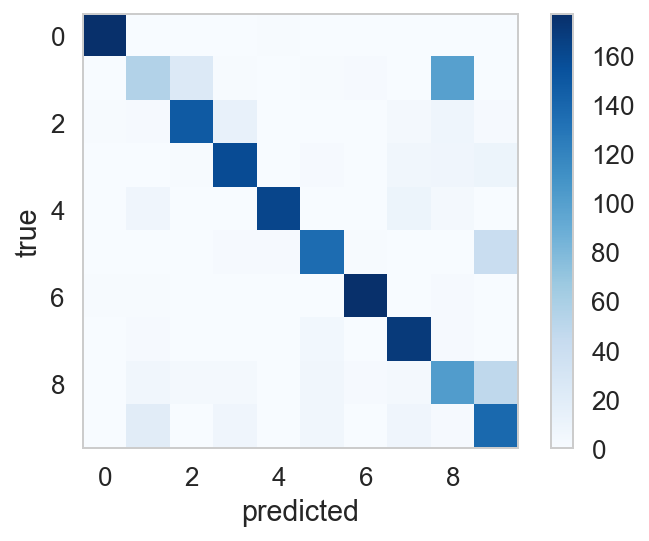

In [54]:
plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar(); plt.grid(False)
plt.ylabel('true'); plt.xlabel('predicted');

## Example application: $k$-means for color compression

* One interesting application of clustering is in color image compression. 
* For example, imagine you have an image with millions of colors. 
* In most images, a large number of the colors will be unused.
* Similarly, a large number of pixels will have similar or identical colors.

`scikit-learn` has a number of images that you can play with, accessed through the `datasets` module. 

For example:

In [55]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

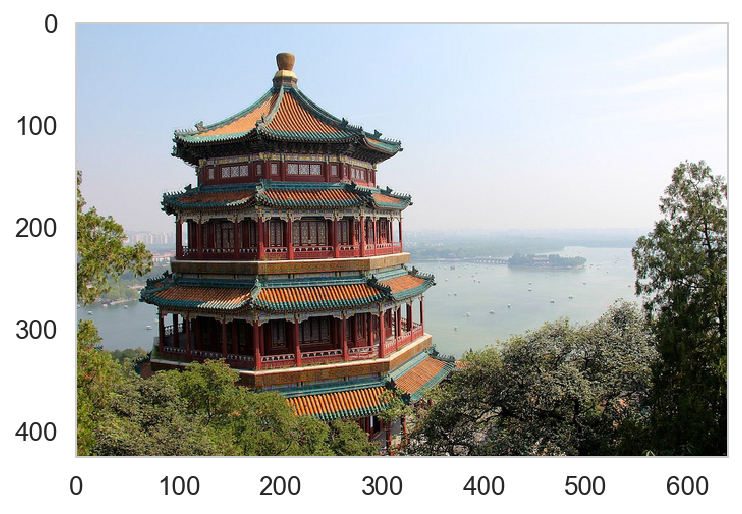

In [56]:
plt.imshow(china); plt.grid(False);

The image itself is stored in a three-dimensional array, of size ``(height, width, RGB)``:

In [57]:
china.shape

(427, 640, 3)

* We can view this image as a cloud of points in a three-dimensional color space. 
* We'll rescale the colors so they lie between 0 and 1, then reshape the array to be a typical `scikit-learn` input:

In [58]:
X = (china / 255.0).reshape(-1, 3)

We now have a three-column data set where each column represents one primary RGB color (red,blue, or green) and each row corresponds to a pixel in the image.

In [59]:
print(X[0:9])

[[ 0.68235294  0.78823529  0.90588235]
 [ 0.68235294  0.78823529  0.90588235]
 [ 0.68235294  0.78823529  0.90588235]
 [ 0.68235294  0.78823529  0.90588235]
 [ 0.68235294  0.78823529  0.90588235]
 [ 0.68235294  0.78823529  0.90588235]
 [ 0.68235294  0.78823529  0.90588235]
 [ 0.68235294  0.78823529  0.90588235]
 [ 0.67843137  0.79215686  0.90980392]]


We now have 273,280 points in three dimensions.

In [60]:
X.shape

(273280, 3)

Our task is to use $k$-means to compress the $256^3$ colors into a smaller number (say, 64 colors). 
* Basically, we want to find $N_{color}$ clusters in the data, and 
* create a new image where the true input color is replaced by the color of the closest cluster.

We'll use `sklearn.cluster.MiniBatchKMeans`, a more sophisticated $k$-means implementation that performs better for larger datasets.
* For the context of our class this implies only a performance enhancement.

In [61]:
from sklearn.cluster import MiniBatchKMeans

In [62]:
# note: my sklearn version produces a lot of deprications warnings
import warnings
warnings.filterwarnings(action='ignore')

In [63]:
n_colors = 64
model = MiniBatchKMeans(n_colors)
labels = model.fit_predict(X)

In [64]:
colors = model.cluster_centers_
new_image = colors[labels].reshape(china.shape)
new_image = (255 * new_image).astype(np.uint8)

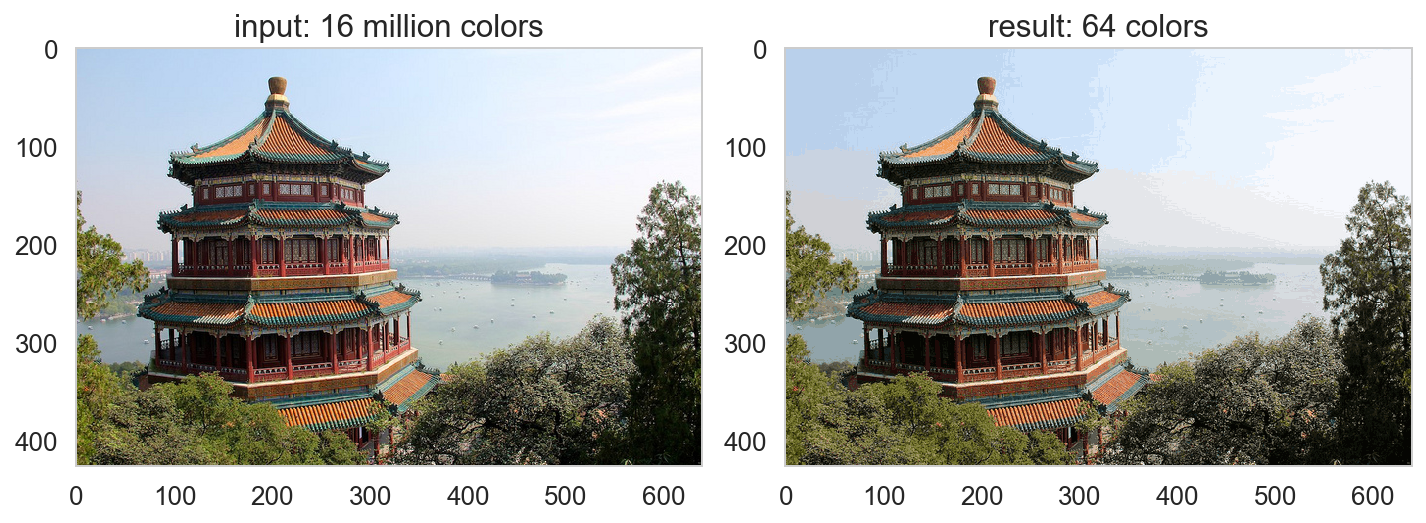

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(china);  ax1.grid(False)
ax1.set_title('input: 16 million colors')
ax2.imshow(new_image); ax2.grid(False)
ax2.set_title('result: {0} colors'.format(n_colors));
plt.tight_layout()

The image lost a little quality, we are using only 64 colors after all. This is particularly visible on the sky area of the photo.

# Final remarks

* There are many and more powerful clustering algorithms.
* Check out https://en.wikipedia.org/wiki/Category:Data_clustering_algorithms
* A good survey:
> Xu, R., & Wunsch, D. (2005). Survey of clustering algorithms. IEEE Transactions on Neural Networks, 16(3), 645–78. http://doi.org/10.1109/TNN.2005.845141

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>
* Part of this notebook uses some materials of the [scikit learn tutorial](https://github.com/jakevdp/sklearn_tutorial/), Copyright (c) 2015, [Jake Vanderplas](http://www.vanderplas.com).

In [66]:
# this code is here for cosmetic reasons
from IPython.core.display import HTML
from urllib.request import urlopen
HTML(urlopen('https://raw.githubusercontent.com/lmarti/jupyter_custom/master/custom.include').read().decode('utf-8'))

--- 